In [10]:
#context


# from tqdm import tqdm
# import time
# x_list=[1,2,3,4,5]
# for x in tdqm(x_list, desc="Looping over range"):
#     time.sleep(1)


from tqdm import tqdm
for i in tqdm(range(10)):
    time.sleep(1)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


In [6]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
#train = pd.read_csv('titanic_train.csv')
#train = pd.read_csv('dataset.csv', sep='|')
train=pd.read_csv("https://raw.githubusercontent.com/rebeccabilbro/titanic/master/data/train.csv")

'''
Logistic regression does not make many of the key assumptions of linear
regression and general linear models that are based on ordinary least squares
algorithms – particularly regarding linearity, normality, homoscedasticity,
and measurement level.
 
First, logistic regression does not require a linear relationship between the
dependent and independent variables.  
Second, the error terms (residuals)  do not need to be normally distributed.
Third, homoscedasticity is not  required.  Finally, the dependent variable 
in logistic regression is not measured on an interval or ratio scale. 
'''

train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

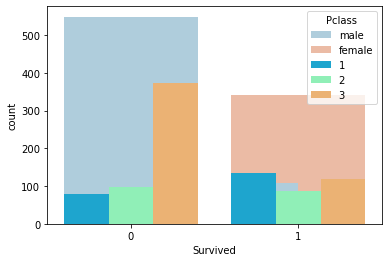

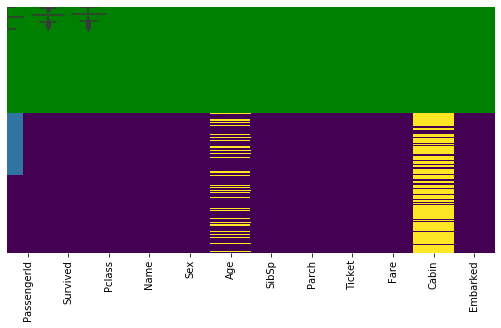

In [5]:
#EDA
sns.countplot(x='Survived',data=train,palette='RdBu_r')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
#sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
sns.countplot(x='SibSp',data=train)
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


'''
Binary logistic regression requires the dependent variable to be binary
and ordinal logistic regression requires the dependent variable to be ordinal.

Logistic regression requires the observations to be independent of each
other.  In other words, the observations should not come from repeated
measurements or matched data.
 
Logistic regression typically requires a large sample size. 
A general guideline is that you need at minimum of 10 cases with the least 
frequent outcome for each independent variable in your model. For example, 
if you have 5 independent variables and the expected probability of your 
least frequent outcome is .10, then you would need a minimum sample 
size of 500 (10*5 / .10).
'''





sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

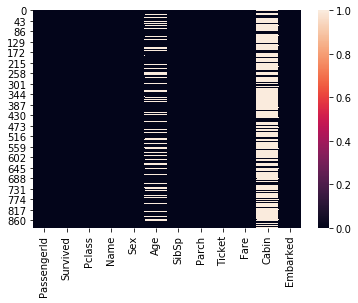

In [11]:
#sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.head()
sns.heatmap(train.isnull())

In [12]:
# Taking care of missing data

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train.groupby('Pclass').mean()['Age'].iloc[0]
        elif Pclass == 2:
            return train.groupby('Pclass').mean()['Age'].iloc[1]
        else:
            return train.groupby('Pclass').mean()['Age'].iloc[2]
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

'''
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset['Age'].values.reshape(-1, 1))
dataset['Age'] = imputer.transform(dataset['Age'].values.reshape(-1, 1))'''







X = train.iloc[:, [2, 4, 5, 6, 7, 9, 10]]
y = train.iloc[:, 1]






'''No multicolinearity - also check for condition number
Logistic regression requires there to be little or no multicollinearity
 among the independent variables.  This means that the independent variables
 should not be too highly correlated with each other.
 
We observe it when two or more variables have a high coorelation.
If a can be represented using b, there is no point using both
c and d have a correlation of 90% (imprefect multicolinearity). if c can be almost
represented using d there is no point using both
FIX : a) Drop one of the two variables. b) Transform them into one variable by taking
mean. c) Keep them both but use caution. 
Test : before creating the model find correlation between each pairs.
'''
multicolinearity_check = train.corr()



/usr/lib/python3/dist-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


KeyError: 'Sex_male'

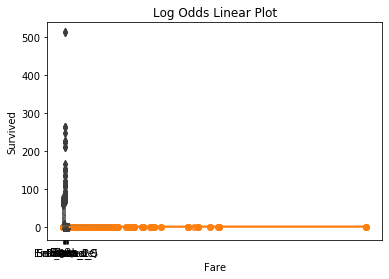

In [13]:

# Encoding categorical data
sex = pd.get_dummies(X['Sex'], prefix = 'Sex')
sex.drop('Sex_male', inplace = True, axis=1)

embark = pd.get_dummies(X['Embarked'], prefix = 'Embarked', drop_first=True)

passenger_class = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
passenger_class.drop('Pclass_3', inplace = True, axis=1)

X.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
X = pd.concat([X,sex,embark, passenger_class],axis=1)

#Outliners
sns.boxplot(data= X).set_title("Outlier Box Plot")

linearity_check_df = pd.concat([pd.DataFrame(X),y],axis=1)

'''
Box-Tidwell test
logistic regression assumes linearity of independent variables and log odds.
 although this analysis does not require the dependent and independent
 variables to be related linearly, it requires that the independent variables
 are linearly related to the log odds.'''
sns.regplot(x= 'Age', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")
sns.regplot(x= 'Fare', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")
sns.regplot(x= 'Sex_male', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")



In [14]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Feature Scaling #Need to be done after splitting
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0,3]] = sc.fit_transform(X_train.iloc[:, [0,3]])
X_test.iloc[:, [0,3]] = sc.transform(X_test.iloc[:, [0,3]])

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:




# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#Find relevant features
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 7


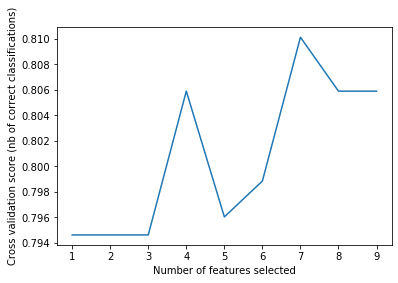

[ True  True False False  True  True  True  True  True]
[1 1 2 3 1 1 1 1 1]


In [16]:

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

from sklearn.feature_selection import RFE

rfe = RFE(classifier, rfecv.n_features_, step=1)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

# Can select columns based on the returned mask
# X.loc[:, rfe.support_]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.75      0.69      0.72        67

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

Optimization terminated successfully.
         Current function value: 0.439802
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.339     
Dependent Variable: Survived         AIC:              797.9684  
Date:               2021-08-14 17:16 BIC:              836.2892  
No. Observations:   889              Log-Likelihood:   -390.98   
Df Model:           7                LL-Null:          -591.41   
Df Residuals:       881              LLR p-value:      1.5682e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
---

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


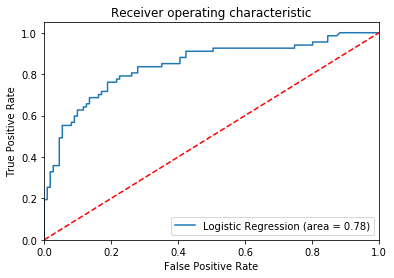

In [17]:


# Predicting the Test set results
y_pred = classifier.predict(X_test)





# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()






# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#Genarate Reports
import statsmodels.api as sm

#X_set = X[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2']]
X_set = X.loc[:, rfe.support_]
X_set = sm.add_constant(X_set)

logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())


# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(result.params), columns= ['OR'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())








#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [18]:
train.head()
# try with automl


# Standard python libraries
import os
import time
import re

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Imports from LightAutoML package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S